# Homework

Take a look at this code. Since it is the first homework, we will guide how to finish it. Make sure you answer all the quesions in <font color="red">red</font> color. The answer is either an output of your code (for example, a figure, a data table), or a paragraph.

# ZeroAccess

(Colab AI) ZeroAccess is a type of ransomware that was first discovered in 2016. It is known for its ability to encrypt files on a victim's computer and then demand a ransom payment in exchange for the decryption key. ZeroAccess is typically distributed through phishing emails or malicious websites.

## Data Tables

In [ ]:
# get data from github

import requests

url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/zeroaccess.zip'

response = requests.get(url)

if response.status_code == 200:
    # Open the file for writing
    with open('zeroaccess.zip', 'wb') as f:
        # Write the response content to the file
        f.write(response.content)
else:
    print('Error: Failed to download the file')

In [ ]:
!unzip zeroaccess.zip

Archive:  zeroaccess.zip
   creating: zeroaccess/
  inflating: zeroaccess/state-internets.csv  
  inflating: zeroaccess/zeroaccess.csv  
  inflating: zeroaccess/county-data.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

z_df = pd.read_csv('zeroaccess/zeroaccess.csv')
s_df = pd.read_csv('zeroaccess/state-internets.csv')
c_df = pd.read_csv('zeroaccess/county-data.csv')

In [ ]:
# the latitude and longitude of the observed ZeroAccess attacks
z_df

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484
...,...,...
808441,42.9634,-85.6681
808442,43.2167,-79.7500
808443,43.8833,-79.7333
808444,-33.8833,151.2167


In [ ]:
# some data of US states
s_df

,state,population,internet
0,Alabama,4758191,3092273
1,Arizona,6665093,5230474
2,Arkansas,2919815,1949869
3,California,37350092,29758896
4,Colorado,5077553,4058749
5,Connecticut,3555261,3074229
6,Delaware,894424,719500
7,District of Columbia,605959,463503
8,Florida,18732783,14764418
9,Georgia,9932505,7597608


In [ ]:
# some other info of (sub-)regions in US states
c_df

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0
...,...,...,...,...,...,...
3067,yuma,arizona,200022,41441,99991,53
3068,yuma,colorado,10119,44991,7662,1
3069,zapata,texas,14290,26009,3833,0
3070,zavala,texas,11961,23952,545,1


## Plot on a Map

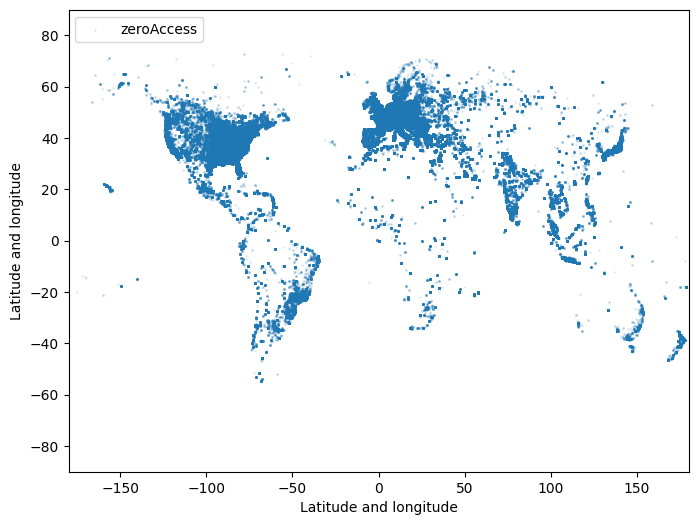

In [ ]:
# plot zeroAccess infection instances on a map
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(z_df.long, z_df.lat, alpha = 0.1, s = 1, label = "zeroAccess")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

## Q1
<font color="red">Try to plot US-only data (i.e., show a map with using only US data).</font> We need a 3rd-party database that can help us to convert the latitude and longitude information in `z_df` to the corresponding nation (and US state).

`reverse_geocoder`'s rearch function can accept a list of (latitude,longitude) and return a list of country informaion.

In [ ]:
!pip install reverse_geocoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268064 sha256=987a6d766b5d2df23a440037c6a15c4d63172a662b6e9018ab7db5902a67edbf
  Stored in directory: /root/.cache/pip/wheels/bd/e5/88/eb139b6d6a26b8022d370ab991f7a836802fed9871975ec6d9
Successfully built reverse_geocoder


In [ ]:
# reverse_geocoder example
# given a list of (latitude,longitude),
# a list of information (in python dictionary format) will be returned.
# we need 'cc' (country code) and 'admin1' (region) for later analysis

import reverse_geocoder
reverse_geocoder.search([(-10, -55), (38.0888, -78.5592)])

Loading formatted geocoded file...


[{'lat': '-9.87556',
  'lon': '-56.08611',
  'name': 'Alta Floresta',
  'admin1': 'Mato Grosso',
  'admin2': 'Alta Floresta',
  'cc': 'BR'},
 {'lat': '38.02931',
  'lon': '-78.47668',
  'name': 'Charlottesville',
  'admin1': 'Virginia',
  'admin2': 'City of Charlottesville',
  'cc': 'US'}]

In [ ]:
import reverse_geocoder

def get_country_and_state_batch(df_of_lat_lng):
    """
    Get the country info from a dataframe containing (latitude, longitude).

    Returns:
        A dataFrame with info from reverse_geocoder
    """

    # Get results from reverse_geocoder
    list_of_lat_lng = list(zip(df_of_lat_lng.lat, df_of_lat_lng.long))
    result_dict_li = reverse_geocoder.search(list_of_lat_lng)
    return pd.DataFrame(result_dict_li).drop(["lat", "lon"], axis = 1)

In [ ]:
z_df.head(10) # example

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484
5,47.0000,20.0000
6,44.8012,-68.7778
7,51.3333,1.4333
8,36.0580,-88.8253
9,20.6000,-100.3833


In [ ]:
_df = get_country_and_state_batch(z_df.head(10)) # this example hass only 10 rows
_df

,name,admin1,admin2,cc
0,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,Charlottesville,Virginia,City of Charlottesville,US
2,Florence,Kentucky,Boone County,US
3,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,Muskegon,Michigan,Muskegon County,US
5,Kocser,Pest,,HU
6,Bangor,Maine,Penobscot County,US
7,Ramsgate,England,Kent,GB
8,Bradford,Tennessee,Gibson County,US
9,Santiago de Queretaro,Queretaro,Queretaro,MX


In [ ]:
# merge latitude, longitude and contry info together
df = z_df.merge(_df, left_index = True, right_index = True)
df

,lat,long,name,admin1,admin2,cc
0,-10.0000,-55.0000,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
3,48.6210,7.4944,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
...,...,...,...,...,...,...
808441,42.9634,-85.6681,Grand Rapids,Michigan,Kent County,US
808442,43.2167,-79.7500,Hamilton,Ontario,,CA
808443,43.8833,-79.7333,Brampton,Ontario,,CA
808444,-33.8833,151.2167,Darlinghurst,New South Wales,City of Sydney,AU


Modify the above example, and only include US data in entire z_df (note that the example shown above only has 10 rows). Lets assume the the dataframe is z_us_df.

In [ ]:
# Your code here!

# z_us_df

,lat,long,name,admin1,admin2,cc
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
6,44.8012,-68.7778,Bangor,Maine,Penobscot County,US
8,36.0580,-88.8253,Bradford,Tennessee,Gibson County,US
...,...,...,...,...,...,...
808436,42.7495,-73.5951,Poestenkill,New York,Rensselaer County,US
808437,33.7490,-84.3880,Atlanta,Georgia,Fulton County,US
808438,43.7173,-71.7163,Plymouth,New Hampshire,Grafton County,US
808441,42.9634,-85.6681,Grand Rapids,Michigan,Kent County,US


Now you can plot the US-only map below.

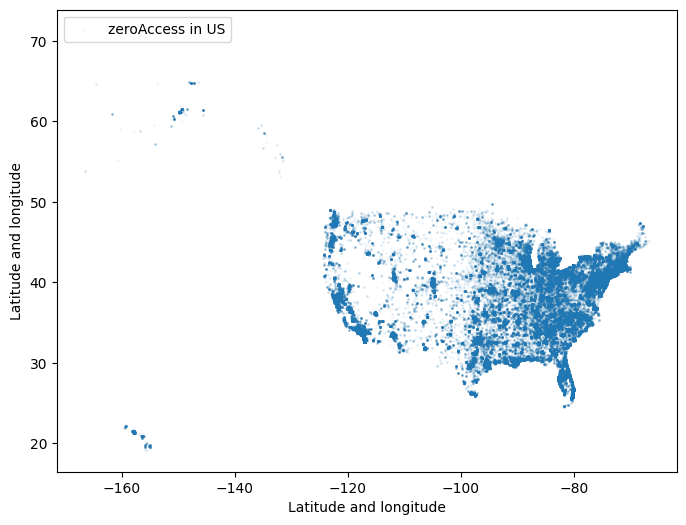

In [ ]:
# Your code here!

# plot zeroAccess infection instances on a map as below

## Q2
<font color="red">Aggregate the number of ZeroAccess attakcs per state (the state name is in 'admin1' column).</font>

Hint: try `value_counts()` function of dataframe, and you can `rename()` a column name for better representation. An example data table is shown, try to output a dataframe as shown below.

In [ ]:
# Your code here!

# z_state_df

,ZeroAccess
California,28162
Texas,22746
Florida,17414
New York,16207
Kansas,15241
Pennsylvania,11020
Ohio,10832
Georgia,10386
Illinois,10312
North Carolina,8989


## Q3

<font color="red">Show the ZeroAccess info per city/county in a state. Which city/county suffers from the ZeroAccess attack the most? (You should output a data table and sort it by the number of attacks, and point out which county has highest attack?)</font>

Note that the city/county name is in 'admin2' column, and some city name may exist in differnt state (so that you cannot simply count the number of attacks by `admin2.value_counts()`)

Hint: try `groupby()`, `count()` functions on a dataframe.

In [ ]:
# Your code here!

cc
admin1       admin2                    
Kansas       Marion County        12655
California   Los Angeles County    8031
Texas        Harris County         4591
Illinois     Cook County           4414
Arizona      Maricopa County       4228
...                                 ...
North Dakota Billings County          1
Georgia      Wheeler County           1
             Towns County             1
Texas        Throckmorton County      1
             Camp County              1

[2969 rows x 1 columns]

## Q4

<font color="red">Does the attack occurance in each state relate to state population or the number of internet users? Using a bar char to demonstrate it!</font>

Hint: you need to first aggrgate 'population' and 'internet' info in `s_df` to `z_state_df`. The dataframe row index should be the state name. And then, you plot 'population', 'internet' and 'ZeroAccess' data in a bar chart as shown below.

In [ ]:
pop_state_df = s_df.copy()
pop_state_df.state = pop_state_df.state.apply(lambda x: 'Washington, D.C.' if x == 'District of Columbia' else x) # District of Columbia -> Washington, D.C.
pop_state_df = pop_state_df.set_index('state')
pop_state_df

,population,internet
state,,
Alabama,4758191,3092273
Arizona,6665093,5230474
Arkansas,2919815,1949869
California,37350092,29758896
Colorado,5077553,4058749
Connecticut,3555261,3074229
Delaware,894424,719500
"Washington, D.C.",605959,463503
Florida,18732783,14764418


In [ ]:
# another way to concate two dataframes
# note that some information is missing!
# try dropna() to remove rows with missing value

compare_df = pd.concat([z_state_df, pop_state_df], join="outer", sort=False, axis=1)
compare_df

,ZeroAccess,population,internet
California,28162,37350092.0,29758896.0
Texas,22746,25042738.0,17176661.0
Florida,17414,18732783.0,14764418.0
New York,16207,19746813.0,16091772.0
Kansas,15241,2848369.0,2248721.0
Pennsylvania,11020,12737230.0,9909482.0
Ohio,10832,11663946.0,8949773.0
Georgia,10386,9932505.0,7597608.0
Illinois,10312,13046084.0,10243294.0
North Carolina,8989,9479467.0,6809315.0


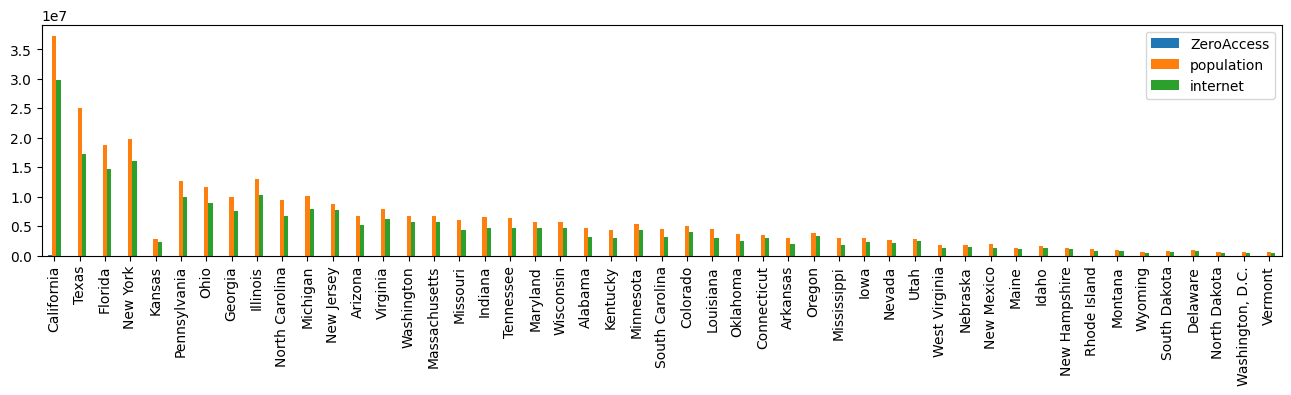

In [ ]:
compare_df[["ZeroAccess", "population", "internet"]].dropna().plot.bar(rot=0, figsize=(16,3))
plt.xticks(rotation=90)
plt.show()

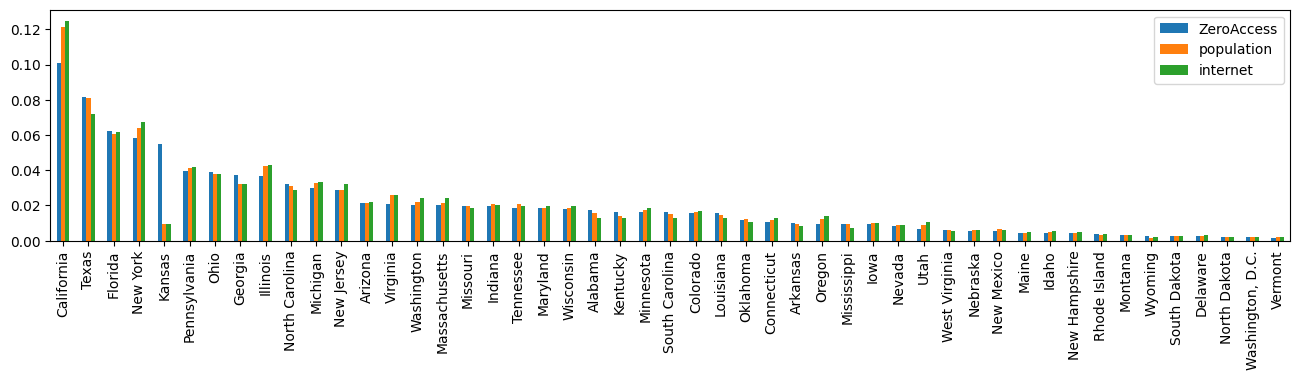

In [ ]:
# try to normalize each column for better presentation

# Your code here!

## Q5

<font color="red">What is the problem of the above figure? Which state has more ZeroAccess attacks w.r.t its population? Can you explain why?</font>

Hint: it is an open quesion.

## Q6

Combine another dataset `c_df` by 'state'.




In [ ]:
c_df

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0
...,...,...,...,...,...,...
3067,yuma,arizona,200022,41441,99991,53
3068,yuma,colorado,10119,44991,7662,1
3069,zapata,texas,14290,26009,3833,0
3070,zavala,texas,11961,23952,545,1


In [ ]:
feature_df = c_df.drop(['subregion'], axis=1).groupby(by='region').sum()

feature_df

,pop,income,ipaddr,ufo2010
region,,,,
alabama,4822023,2522962,22542601,250
arizona,6532974,612727,62062174,1250
arkansas,2949131,2677866,4810526,265
california,38041430,3241756,156511903,3769
colorado,5129284,3206281,22787577,513
connecticut,3590347,565060,40993589,280
delaware,917092,172156,19378182,74
district of columbia,632323,61835,10759507,1
florida,19317568,2990011,23716071,1465


In [ ]:
# copy data and change state to lowercase
# because the state name in feature_df is lowercase
compare_lower_df = compare_df.copy()
compare_lower_df = compare_lower_df.reset_index().rename(columns={"index":"state"})
compare_lower_df.state = compare_lower_df.state.apply(lambda s: s.lower() if s != "Washington, D.C." else "district of columbia")
compare_lower_df = compare_lower_df.set_index('state')
compare_lower_df

,ZeroAccess,population,internet
state,,,
california,28162,37350092.0,29758896.0
texas,22746,25042738.0,17176661.0
florida,17414,18732783.0,14764418.0
new york,16207,19746813.0,16091772.0
kansas,15241,2848369.0,2248721.0
pennsylvania,11020,12737230.0,9909482.0
ohio,10832,11663946.0,8949773.0
georgia,10386,9932505.0,7597608.0
illinois,10312,13046084.0,10243294.0


In [ ]:
# create final feature dataframe
# remove pop or population column
# join two dataframes
# dropna() to remove rows with missing value
# axis=1 to concat columns
# join="outer" to keep all rows

feature_df = pd.concat([feature_df, compare_lower_df], join="outer", sort=False, axis=1).dropna().drop(['pop'], axis = 1)
feature_df

,income,ipaddr,ufo2010,ZeroAccess,population,internet
alabama,2522962.0,22542601.0,250.0,4779,4758191.0,3092273.0
arizona,612727.0,62062174.0,1250.0,5928,6665093.0,5230474.0
arkansas,2677866.0,4810526.0,265.0,2738,2919815.0,1949869.0
california,3241756.0,156511903.0,3769.0,28162,37350092.0,29758896.0
colorado,3206281.0,22787577.0,513.0,4413,5077553.0,4058749.0
connecticut,565060.0,40993589.0,280.0,2924,3555261.0,3074229.0
delaware,172156.0,19378182.0,74.0,740,894424.0,719500.0
district of columbia,61835.0,10759507.0,1.0,621,605959.0,463503.0
florida,2990011.0,23716071.0,1465.0,17414,18732783.0,14764418.0
georgia,6433814.0,20947043.0,548.0,10386,9932505.0,7597608.0


## Q7

Now we can <font color="red">perform linear regression, and explain the results.</font>


Set $X$ be `["population", "income", "ipaddr", "ufo2010", "internet"]`,
let $y$ be `ZeroAccess`.

In [ ]:
X_train = feature_df[["population", "income", "ipaddr", "ufo2010", 'internet']]
y_train = feature_df['ZeroAccess']

In [ ]:
from sklearn.linear_model import LinearRegression
linearRegModel = LinearRegression()
linearRegModel.fit(X_train, y_train)

print("Intercept is ", linearRegModel.intercept_)
print("coefficients  is ", linearRegModel.coef_)

Intercept is  -207.7688762400021
coefficients  is  [ 4.72217202e-04  4.49180000e-04  4.75719076e-07 -2.83257931e-01
  3.68395519e-04]


In [ ]:
# print with feature name
print()
print("ZeroAccess = ")
for c,f in zip(linearRegModel.coef_, X_train.columns):
  print(' {0:+} * {1}'.format(c, f))
print("", linearRegModel.intercept_)


ZeroAccess = 
 +0.00047221720183212337 * population
 +0.00044917999979040733 * income
 +4.757190756166487e-07 * ipaddr
 -0.283257930594684 * ufo2010
 +0.00036839551867998426 * internet
 -207.7688762400021


Q8

Now we can <font color="red">perform linear regression with StandardScaler, and explain the results.</font>


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
nolinearRegModel = LinearRegression()
nolinearRegModel.fit(scaled_X_train, y_train)

print("Intercept is ", nolinearRegModel.intercept_)
print("coefficients  is ", nolinearRegModel.coef_)

print()
print("ZeroAccess = ")
for c,f in zip(nolinearRegModel.coef_, X_train.columns):
  print(' {0:+} * {1}'.format(c, f))
print("", nolinearRegModel.intercept_)

Intercept is  5693.408163265306
coefficients  is  [3230.75776632  883.77156561   19.56772197 -169.26019045 1962.55761927]

ZeroAccess = 
 +3230.757766322388 * population
 +883.7715656071575 * income
 +19.567721972322147 * ipaddr
 -169.26019044995473 * ufo2010
 +1962.557619266866 * internet
 5693.408163265306
